In [3]:
from gensim.models.ldamodel import LdaModel
import gensim
import pandas as pd
import glob
from nltk.corpus import stopwords
import string
from gensim import corpora,models
from gensim.utils import lemmatize # Only keep nums
from gensim.corpora import Dictionary
%matplotlib inline
import matplotlib.pyplot as plt
from nltk.stem.wordnet import WordNetLemmatizer
import sys
import numpy as np

C:\Users\mnan\Anaconda3\lib\site-packages\gensim\utils.py:840: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Users\mnan\Anaconda3\lib\site-packages\gensim\utils.py:1015: UserWarning: Pattern library is not installed, lemmatization won't be available.
  warnings.warn("Pattern library is not installed, lemmatization won't be available.")


In [76]:
def process_text(content_list):
    """
    stopwords
    
    punctuation
    
    digits
    
    english words
    
    """
    typical_words = ['light','therapy','facial','treatment']
    stoplist = stopwords.words('english') + typical_words 
    
    remove_digits = str.maketrans('', '', string.digits)
    remove_punctuation = str.maketrans('', '', string.punctuation)
    
    dict_english = enchant.Dict("en_US")
    
    lemma = WordNetLemmatizer()
    
    
    content_cleaned =[i.translate(remove_digits) for i in content_list]
    
    content_cleaned = [i.translate(remove_punctuation) for i in content_cleaned]
    
    content_cleaned = [[lemma.lemmatize(word.lower()) for word in line.split()
                        if (word.lower() not in stoplist) and dict_english.check(word.lower())==True] for line in content_cleaned]

    return content_cleaned

In [78]:
content = pd.read_csv('text.csv',encoding = 'iso-8859-1',header=None)
content.columns = ['content']
content['content']
print(len(content))
contendf_bowt_list = content['content'].values
cleaned_list = process_text(content_list)
print('after process....')
print(len(cleaned_list))

8001
after process....
8001


In [81]:
len(list(filter(lambda x:x==[],cleaned_list)))

14

In [82]:
dictionary = Dictionary(cleaned_list)
corpus = [dictionary.doc2bow(text) for text in cleaned_list]

In [83]:
num_topics = 10
lda = LdaModel(corpus, num_topics= num_topics,id2word = dictionary)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"violet" + 0.016*"benefit" + 0.015*"skin" + 0.010*"help" + 0.008*"low" + 0.007*"time" + 0.007*"black" + 0.007*"level" + 0.006*"red" + 0.005*"body" + 0.005*"muscle" + 0.005*"one" + 0.005*"mask" + 0.005*"led" + 0.004*"tone"'),
 (1,
  '0.056*"led" + 0.052*"skin" + 0.030*"wrinkle" + 0.026*"acne" + 0.015*"care" + 0.012*"ultrasound" + 0.012*"ultrasonic" + 0.012*"blue" + 0.011*"high" + 0.011*"red" + 0.010*"intensity" + 0.009*"machine" + 0.009*"focused" + 0.009*"collagen" + 0.008*"rt"'),
 (2,
  '0.019*"day" + 0.017*"new" + 0.017*"mask" + 0.014*"device" + 0.013*"rt" + 0.013*"exciting" + 0.013*"complete" + 0.012*"launching" + 0.011*"added" + 0.007*"medical" + 0.007*"led" + 0.007*"pub" + 0.005*"acne" + 0.005*"patient" + 0.005*"health"'),
 (3,
  '0.099*"led" + 0.061*"mask" + 0.056*"skin" + 0.048*"acne" + 0.042*"beauty" + 0.040*"photon" + 0.040*"rejuvenation" + 0.035*"new" + 0.028*"color" + 0.026*"blue" + 0.025*"red" + 0.018*"care" + 0.016*"sun" + 0.014*"face" + 0.012*"healing"'),
 (4

In [85]:
assign = []
for i in range(len(corpus)):
    assign.append(sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][0])
conf_score = []
for i in range(len(corpus)):
    conf_score.append(sorted(lda[corpus[i]],key = lambda x:x[1],reverse = True)[0][1])

In [86]:
df_bow = pd.DataFrame({'original_text':content.content.values,
             'corpus':corpus,
            'assign':assign,
            'conf_score':conf_score,
                      'bow':cleaned_list})

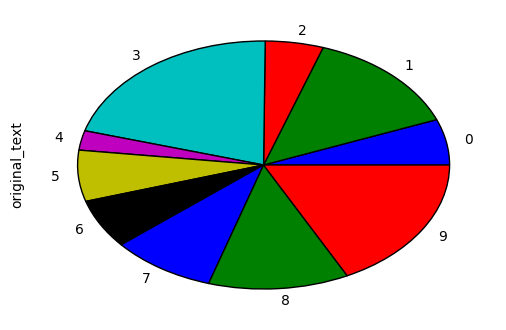

In [87]:
df_bow.groupby('assign').count()['original_text'].plot(kind='pie')

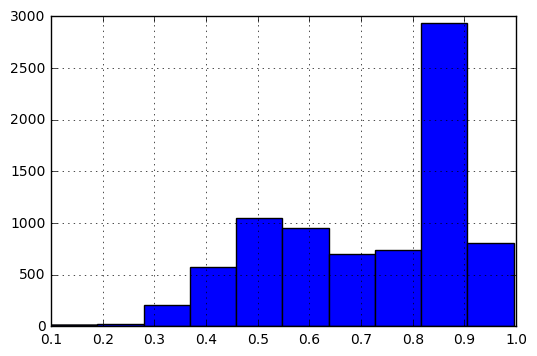

In [88]:
df_bow['conf_score'].hist()

In [89]:
df_bow[df_bow['conf_score']<0.5][['bow','original_text']]

,bow,original_text
0,"[rt, skincare, benefit, violet]",RT @Theralight: Skincare Benefits of Violet Li...
11,"[intranasal, infrared, heal, naturally]",$499 VieLight Intranasal Light Therapy 810 Inf...
15,"[eczema, led]",Eczema before and after only 2 Dermalux LED Li...
21,"[beauty, health, brand, daylight, sky, bright,...",Beauty sherif.ws/main2.php?link? #2389 #1003 C...
41,"[highly, effective, outpatient, many, skin, co...",Light therapy is a highly effective outpatient...
43,"[try, photo, target, red, brown, spot, leaving...",Try a photo facial! It targets ur red & brown ...
50,"[new, galvanic, ultrasonic, ion, red, led, wri...",New Galvanic Ultrasonic Ion RED LED Light Ther...
52,"[electric, led, eye, care, massage, pen, photo...",2 in 1 Electric LED Therapy Eye Care Massage P...
64,"[rt, remove, brown, sun, spot, red, vein, lead...",RT @GreenSpaVan: #SaturdaySkinCare: #IPL #Phot...
70,"[tip, get, acne]",10 Tips to Get the Most Out of Light Therapy p...


Now we try to use TFIDF

In [98]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
num_topics = 10
lda_tfidf = LdaModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"violet" + 0.016*"benefit" + 0.015*"skin" + 0.010*"help" + 0.008*"low" + 0.007*"time" + 0.007*"black" + 0.007*"level" + 0.006*"red" + 0.005*"body" + 0.005*"muscle" + 0.005*"one" + 0.005*"mask" + 0.005*"led" + 0.004*"tone"'),
 (1,
  '0.056*"led" + 0.052*"skin" + 0.030*"wrinkle" + 0.026*"acne" + 0.015*"care" + 0.012*"ultrasound" + 0.012*"ultrasonic" + 0.012*"blue" + 0.011*"high" + 0.011*"red" + 0.010*"intensity" + 0.009*"machine" + 0.009*"focused" + 0.009*"collagen" + 0.008*"rt"'),
 (2,
  '0.019*"day" + 0.017*"new" + 0.017*"mask" + 0.014*"device" + 0.013*"rt" + 0.013*"exciting" + 0.013*"complete" + 0.012*"launching" + 0.011*"added" + 0.007*"medical" + 0.007*"led" + 0.007*"pub" + 0.005*"acne" + 0.005*"patient" + 0.005*"health"'),
 (3,
  '0.099*"led" + 0.061*"mask" + 0.056*"skin" + 0.048*"acne" + 0.042*"beauty" + 0.040*"photon" + 0.040*"rejuvenation" + 0.035*"new" + 0.028*"color" + 0.026*"blue" + 0.025*"red" + 0.018*"care" + 0.016*"sun" + 0.014*"face" + 0.012*"healing"'),
 (4

In [99]:
assign = []
for i in range(len(corpus_tfidf)):
    assign.append(sorted(lda_tfidf[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][0])
conf_score = []
for i in range(len(corpus_tfidf)):
    conf_score.append(sorted(lda[corpus_tfidf[i]],key = lambda x:x[1],reverse = True)[0][1])

In [104]:
df_tfidf = pd.DataFrame({'original_text':content.content.values,
             'corpus':corpus,
            'assign':assign,
            'conf_score':conf_score,
                      'bow':cleaned_list})

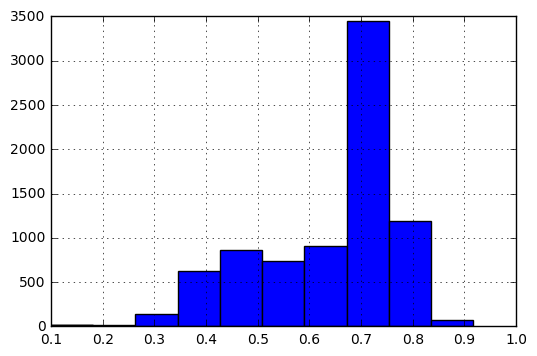

In [105]:
df_tfidf['conf_score'].hist()

In [106]:
df_tfidf[df_tfidf['conf_score']<0.5][['bow','original_text']]

,bow,original_text
0,"[rt, skincare, benefit, violet]",RT @Theralight: Skincare Benefits of Violet Li...
8,"[rt, reverse, pigmentation]",RT @annawinek: How Does Light Therapy Reverse ...
11,"[intranasal, infrared, heal, naturally]",$499 VieLight Intranasal Light Therapy 810 Inf...
17,"[rt, celebrating, new, acne, mask]",RT @olivia_holt: Celebrating #TreatYoSelfDay w...
21,"[beauty, health, brand, daylight, sky, bright,...",Beauty sherif.ws/main2.php?link? #2389 #1003 C...
27,"[photon, rejuvenation, body, ultrasonic, skin,...","US!Great Photon Rejuvenation Facial, Body Ultr..."
41,"[highly, effective, outpatient, many, skin, co...",Light therapy is a highly effective outpatient...
43,"[try, photo, target, red, brown, spot, leaving...",Try a photo facial! It targets ur red & brown ...
50,"[new, galvanic, ultrasonic, ion, red, led, wri...",New Galvanic Ultrasonic Ion RED LED Light Ther...
52,"[electric, led, eye, care, massage, pen, photo...",2 in 1 Electric LED Therapy Eye Care Massage P...


In [107]:
import nltk
import itertools
from collections import Counter
import operator

In [108]:
corpus_with_pos = list(map(lambda x:nltk.pos_tag(x),cleaned_list))

In [109]:
sorted(dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items(),key=operator.itemgetter(1),reverse = True)

[('NN', 51277),
 ('JJ', 18062),
 ('VBD', 4885),
 ('VBG', 3988),
 ('RB', 3280),
 ('VBN', 2542),
 ('VB', 2152),
 ('VBP', 1607),
 ('IN', 1293),
 ('NNS', 1119),
 ('FW', 521),
 ('VBZ', 521),
 ('CD', 514),
 ('JJR', 446),
 ('MD', 422),
 ('JJS', 330),
 ('CC', 144),
 ('RBR', 141),
 ('PRP', 137),
 ('DT', 98),
 ('NNP', 73),
 ('RBS', 55),
 ('RP', 37),
 ('WP', 33),
 ('WRB', 18),
 ('SYM', 12),
 ('EX', 6),
 ('UH', 5),
 ('WDT', 4),
 ('WP$', 2),
 ('PRP$', 1)]

C:\Users\mnan\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


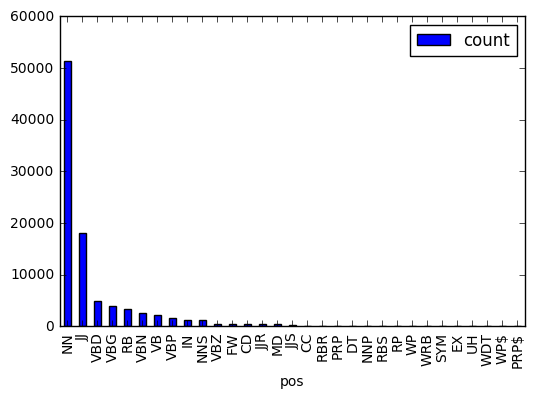

In [110]:
count_pos_dict = dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[])))))
pd.DataFrame({'count':list(count_pos_dict.values()),'pos':list(count_pos_dict.keys())}).set_index('pos').sort('count',ascending=False).plot(kind = 'bar')

In [111]:
keep_pos = ['JJ','JJS','JJR','NN','NNP','RB','VB','VBP','VBZ','RBR','VBD','VBN']

In [112]:
list(filter(lambda x: x[0] in keep_pos,dict(Counter(list(map(lambda x: x[1],sum(corpus_with_pos,[]))))).items()))

[('JJS', 330),
 ('VBN', 2542),
 ('VBP', 1607),
 ('NNP', 73),
 ('VBZ', 521),
 ('VBD', 4885),
 ('JJ', 18062),
 ('VB', 2152),
 ('JJR', 446),
 ('RBR', 141),
 ('RB', 3280),
 ('NN', 51277)]

In [113]:
filtered_corpus_with_pos=[]
for i in corpus_with_pos:
    filtered_corpus_with_pos.append(list(filter(lambda x: x[1] in keep_pos,i)))

In [114]:
filtered_corpus_by_pos = []
for i in filtered_corpus_with_pos:
    filtered_corpus_by_pos.append(list(map(lambda x: x[0],i)))

In [115]:
dictionary_pos = Dictionary(filtered_corpus_by_pos)
corpus_pos = [dictionary_pos.doc2bow(text) for text in filtered_corpus_by_pos]

In [117]:
tfidf_by_pos = models.TfidfModel(corpus_pos)
corpus_by_pos_tfidf = tfidf_by_pos[corpus_pos]
num_topics = 10
lda_pos_tfidf = LdaModel(corpus_by_pos_tfidf, id2word=dictionary_pos, num_topics=num_topics)
lda_pos_tfidf.show_topics(num_topics,10)

[(0,
  '0.019*"photo" + 0.019*"goodness" + 0.018*"thank" + 0.017*"light" + 0.011*"mask" + 0.010*"collagen" + 0.009*"acne" + 0.007*"skin" + 0.007*"repair" + 0.007*"wrinkle"'),
 (1,
  '0.106*"environment" + 0.104*"bus" + 0.103*"brighten" + 0.100*"stop" + 0.099*"panel" + 0.096*"news" + 0.090*"energy" + 0.086*"technology" + 0.085*"winter" + 0.003*"treat"'),
 (2,
  '0.025*"think" + 0.015*"tried" + 0.014*"got" + 0.013*"perhaps" + 0.013*"quality" + 0.011*"issue" + 0.011*"many" + 0.011*"skincare" + 0.010*"realize" + 0.010*"rosy"'),
 (3,
  '0.013*"skin" + 0.013*"work" + 0.012*"dermatology" + 0.011*"watch" + 0.011*"video" + 0.010*"fight" + 0.009*"safest" + 0.009*"probably" + 0.009*"renowned" + 0.009*"related"'),
 (4,
  '0.027*"complete" + 0.025*"exciting" + 0.025*"day" + 0.022*"rt" + 0.018*"matter" + 0.017*"pain" + 0.017*"downtime" + 0.017*"needle" + 0.015*"mask" + 0.014*"intensity"'),
 (5,
  '0.090*"violet" + 0.051*"benefit" + 0.031*"skincare" + 0.024*"cause" + 0.024*"rt" + 0.012*"home" + 0.012

In [118]:
bigram = gensim.models.Phrases(cleaned_list,min_count=1, threshold=2)
dictionary_text_list = list(bigram[cleaned_list])
train_text_list = list(bigram[cleaned_list])
dictionary_bigram = Dictionary(dictionary_text_list)
corpus_bigram = [dictionary_bigram.doc2bow(text) for text in train_text_list]

C:\Users\mnan\Anaconda3\lib\site-packages\gensim\models\phrases.py:248: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [119]:
num_topics = 10
lda_tfidf = LdaModel(corpus_bigram, id2word=dictionary_bigram, num_topics=num_topics)
lda.show_topics(num_topics,15)

[(0,
  '0.027*"violet" + 0.016*"benefit" + 0.015*"skin" + 0.010*"help" + 0.008*"low" + 0.007*"time" + 0.007*"black" + 0.007*"level" + 0.006*"red" + 0.005*"body" + 0.005*"muscle" + 0.005*"one" + 0.005*"mask" + 0.005*"led" + 0.004*"tone"'),
 (1,
  '0.056*"led" + 0.052*"skin" + 0.030*"wrinkle" + 0.026*"acne" + 0.015*"care" + 0.012*"ultrasound" + 0.012*"ultrasonic" + 0.012*"blue" + 0.011*"high" + 0.011*"red" + 0.010*"intensity" + 0.009*"machine" + 0.009*"focused" + 0.009*"collagen" + 0.008*"rt"'),
 (2,
  '0.019*"day" + 0.017*"new" + 0.017*"mask" + 0.014*"device" + 0.013*"rt" + 0.013*"exciting" + 0.013*"complete" + 0.012*"launching" + 0.011*"added" + 0.007*"medical" + 0.007*"led" + 0.007*"pub" + 0.005*"acne" + 0.005*"patient" + 0.005*"health"'),
 (3,
  '0.099*"led" + 0.061*"mask" + 0.056*"skin" + 0.048*"acne" + 0.042*"beauty" + 0.040*"photon" + 0.040*"rejuvenation" + 0.035*"new" + 0.028*"color" + 0.026*"blue" + 0.025*"red" + 0.018*"care" + 0.016*"sun" + 0.014*"face" + 0.012*"healing"'),
 (4

** Look Bad **

# Conclusion:

#### Bag of Words is the best